In [2]:
!pip install selenium

# importing libraries

In [3]:
import pandas as pd
import selenium
from selenium import webdriver
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

# Q1) Write a python program which searches all the product under a particular product from
www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user 
input is ‘guitar’. Then search for guitars.

In [4]:
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

In [58]:
url = "http://www.amazon.in/"
driver.get(url)


In [43]:
# Locating the search bar
search_bar = driver.find_element_by_id("twotabsearchtextbox") 
search_bar.clear()
search_bar.send_keys("laptops")

In [44]:
#locating the button and clicking it toh search for sunglasses
time.sleep(2)

button=driver.find_element_by_id('nav-search-submit-button')
button.click()




# Q2) In the above question, now scrape the following details of each product listed in first 3 pages 
of your search results and save it in a dataframe and csv. In case if any product has less than 3 
pages in search results then scrape all the products available under that product vertical. 
Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", 
"Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and 
“Product URL”. In case, if any of the details are missing for any of the product then replace it 
by “-

In [46]:
# creating the empty list

Name=[]
rating=[]
n_rating=[]
Price=[]
exchange=[]
avail=[]
detail=[]
p_url=[]
delivery=[]

In [47]:
# scrapping detail
start=0
end=3
for page in range(start,end):
    names=driver.find_elements_by_class_name('a-size-medium a-color-base a-text-normal')
    for i in names:
        Name.append(i.text)
    prices=driver.find_elements_by_class_name('a-price-whole')
    for i in prices:
        Price.append(i.text)
    delv=driver.find_elements_by_class_name('a-text-bold')
    for i in delv:
        delivery.append(i.text)
    no=driver.find_elements_by_class_name('a-size-base')
    for i in no:
        n_rating.append(i.text)
    nxt_button=driver.find_elements_by_xpath("//li[@class='a-normal']/a")
    try:
        driver.get(nxt_button[1].get_attribute('href'))
    except:
        driver.get(nxt_button[0].get_attribute('href'))
    

In [59]:
# scrapping names
start=0
end=3
for page in range(start,end):
    names=driver.find_elements_by_xpath("//span[@class='a-size-medium a-color-base a-text-normal']")
    for i in names:
        Name.append(i.text)
    nxt_button=driver.find_elements_by_xpath("//li[@class='a-normal']/a")
    try:
        driver.get(nxt_button[1].get_attribute('href'))
    except:
        driver.get(nxt_button[0].get_attribute('href'))
        

In [62]:
# scrapping product url
start=0
end=3
for page in range(start,end):
    pro=driver.find_elements_by_class_name("a-aui_72554-c a-aui_accordion_a11y_role_354025-c a-aui_button_aria_label_markup_348458-t1 a-aui_csa_templates_buildin_ww_exp_337518-c a-aui_csa_templates_buildin_ww_launch_337517-c a-aui_csa_templates_declarative_ww_exp_337521-c a-aui_csa_templates_declarative_ww_launch_337520-c a-aui_dynamic_img_a11y_markup_345061-t1 a-aui_launch_cardui_a11y_fix_346896-c a-aui_markup_disabled_link_btn_351411-c a-aui_mm_desktop_exp_v2_353724-c a-aui_mm_desktop_gate_v2_353720-c a-aui_mm_desktop_targeted_exp_291928-c a-aui_mm_desktop_targeted_launch_291922-c a-aui_pci_risk_banner_210084-c a-aui_popover_trigger_add_role_350993-c a-aui_preload_261698-c a-aui_rel_noreferrer_noopener_309527-c a-aui_template_weblab_cache_333406-c a-aui_tnr_v2_180836-c")
    for i in pro:
        p_url.append(i.text)
    nxt_button=driver.find_elements_by_xpath("//li[@class='a-normal']/a")
    try:
        driver.get(nxt_button[1].get_attribute('href'))
    except:
        driver.get(nxt_button[0].get_attribute('href'))
            

In [55]:
#locating Ratings

urls=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
UR=[]
for i in urls:
    UR.append(i.get_attribute('href'))
for url in UR:
    driver.get(url)
    try:
        ratings=driver.find_element_by_xpath("//span[@class='a-size-base a-nowrap']//span")
        rating.append(ratings.text)
    except NoSuchElementException:
        rating.append("NO rating")

In [70]:
start=0
end=3
for page in range(start,end):
    stck=driver.find_elements_by_class_name("a-size-small a-color-price")
    for i in stck:
        avail.append(i.text)
    nxt_button=driver.find_elements_by_xpath("//li[@class='a-normal']/a")
    try:
        driver.get(nxt_button[1].get_attribute('href'))
    except:
        driver.get(nxt_button[0].get_attribute('href'))
                
        
   

In [66]:
# creating dataframe
data=pd.DataFrame({})
data['Name and Details']=Name
data['Price']=Price
data['Rating']=rating
data['Number of Rating']=n_rating
data['Delivery by']=delivery

In [67]:
data

,Name and Details,Price,Rating,Number of Rating,Delivery by
0,(Renewed) Dell Intel Core i7 4th Gen 14 Inch(3...,"54,999",3 out of 5,"1-24 of 393 results for ""laptops""\nSort by:\nF...","""laptops"""
1,"HP Pavilion x360 (2021) 14"" (35.56cms) FHD Tou...","76,990",NO rating,Shop now,"Monday, July 5"
2,HP Pavilion (2021) Thin & Light 11th Gen Core ...,"84,990",3.7 out of 5,"₹54,999\n₹1,20,000 Save ₹65,001 (54%)","Saturday, July 3"
3,HP Pavilion Gaming(2021) 10th Gen Intel Core i...,"90,990",3.7 out of 5,"₹54,999\n₹1,20,000","Friday, July 2"
4,(Renewed) Dell Intel Core i7 4th Gen 14 Inch(3...,"45,999",NO rating,"Get it by Monday, July 5\nFREE Delivery by Amazon","Monday, July 5"
5,HP Pavilion Gaming 10th Gen Intel Core i7 Proc...,"86,990",NO rating,Only 1 left in stock.,"Monday, July 5"
6,(Renewed) Dell Intel Core i7 4th Gen 14 Inch(3...,"42,999",NO rating,40,"Sunday, July 4"
7,Mi Notebook Horizon Edition 14 Intel Core i7-1...,"59,999",NO rating,"₹76,990\n₹89,999 Save ₹13,009 (14%)","Monday, July 5"
8,(Renewed) Dell Intel Core i7 4th Gen 14 Inch(3...,"49,999",NO rating,"₹76,990\n₹89,999","Monday, July 5"
9,ASUS VivoBook S S14 Intel Core i7-1165G7 11th ...,"77,990",NO rating,Save extra with No Cost EMI,"Saturday, July 3"


# Q3) Write a python program to access the search bar and search button on images.google.com and 
scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

In [18]:
url = "https://www.google.com/imghp?tbm=isch&ved=2ahUKEwjAs8v44LnxAhW5F7cAHRuBCzsQ2-cCegQIABAA&oq=&gs_lcp=CgNpbWcQAzIFCAAQsQMyBQgAELEDMgUIABCxAzICCAAyAggAMgIIADIICAAQsQMQgwEyBQgAELEDMgIIADICCAA6BAgAEEM6BwgAELEDEEM6CggAELEDEIMBEENQ4YITWK2rE2CLrRNoAHAAeAOAAaQEiAGIG5IBCjAuMTcuMS41LTGYAQCgAQGqAQtnd3Mtd2l6LWltZ7ABAMABAQ&sclient=img&ei=ynPZYMCmF7mv3LUPm4Ku2AM&bih=710&biw=1536"
driver.get(url)


In [8]:
# loacting search bar 
# fruits
frt=driver.find_element_by_xpath("//div[@class='a4bIc']/input")
frt.send_keys('fruits')



In [11]:
# clicking search button for fruits
frt_btn=driver.find_element_by_xpath("//button[@class='Tg7LZd']")
frt_btn.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNUHU6x05Oi70JB0pQuKBqAouJammPXxs9JA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3OMnNO8foocyzpfiyNAC_MUmewO539Bp2lw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTI66UC7myxbMPqVRrKuLpqhEOThyOWYlqYig&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
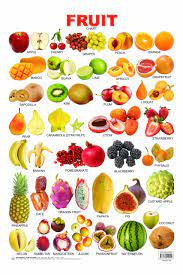
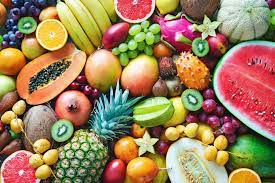
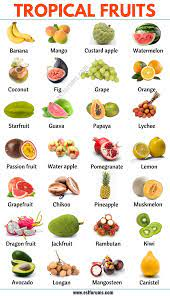
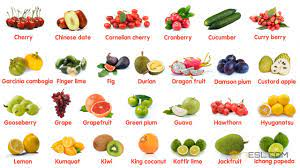
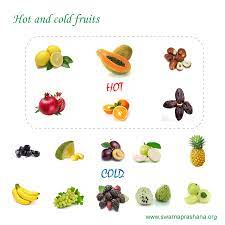
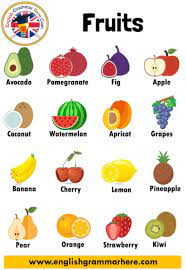
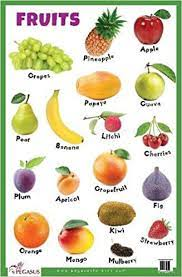
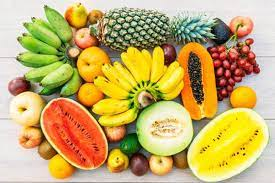
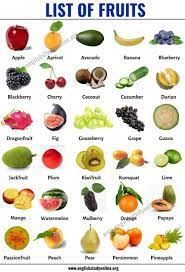
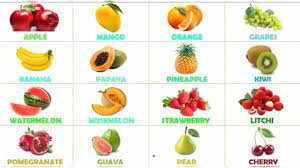
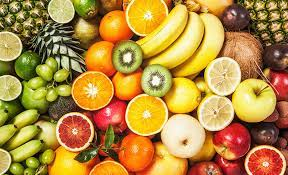
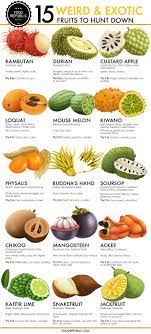
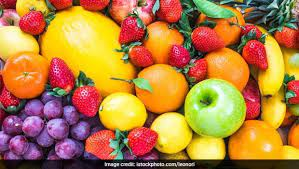
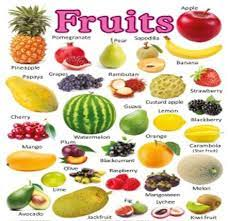
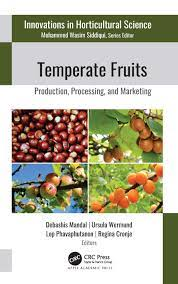
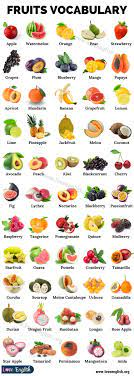
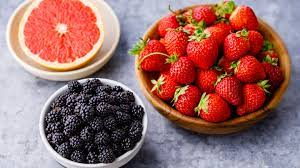
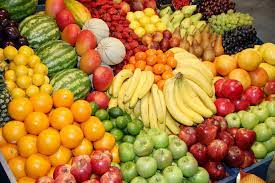
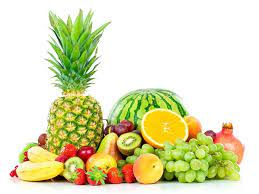
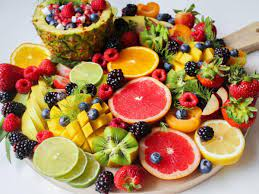

In [12]:
# scrapping detail for fruits
fruits=[]
for i in driver.find_elements_by_xpath("//div[@class='bRMDJf islir']/img"):
    fruits.append(i.get_attribute('src'))
fruits[:100]    


In [16]:
# loacting search bar 
# cars
car=driver.find_element_by_xpath("//div[@class='a4bIc']/input")
car.send_keys('cars')



In [17]:
# clicking search button for cars
car_btn=driver.find_element_by_xpath("//button[@class='Tg7LZd']")
car_btn.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
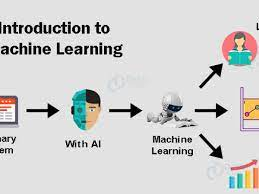
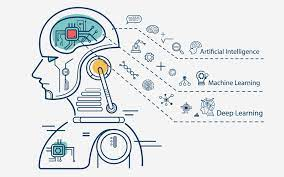
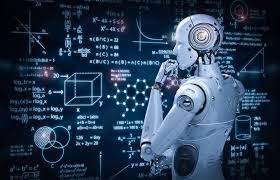
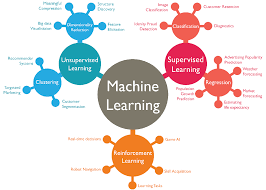
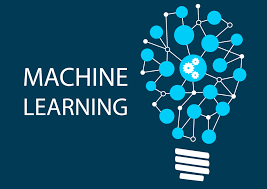
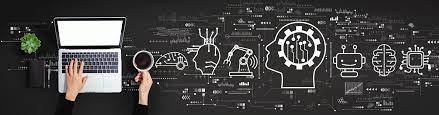
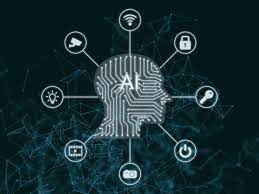
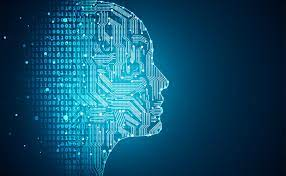
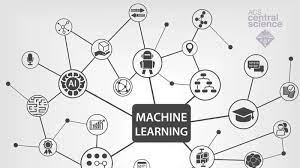
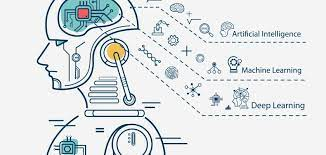
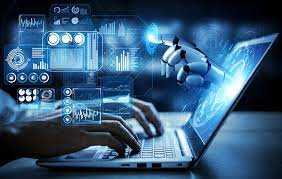
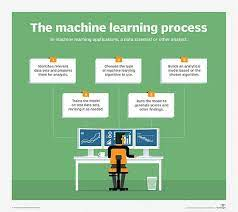
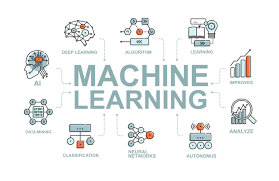
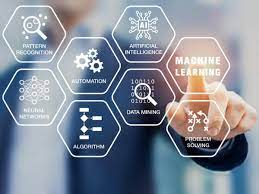
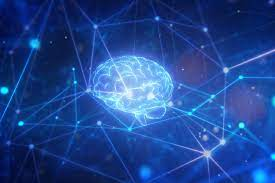
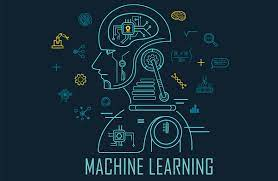
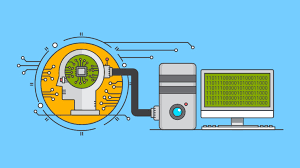
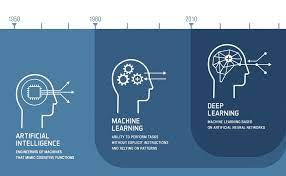
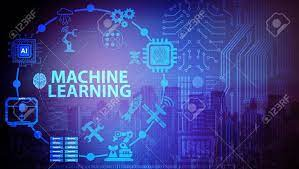
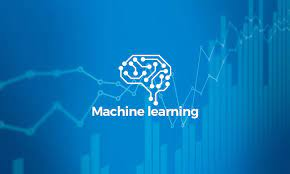

In [23]:
# scrapping detail for cars
cars=[]
for i in driver.find_elements_by_xpath("//div[@class='bRMDJf islir']/img"):
    cars.append(i.get_attribute('src'))
cars[:100]    

In [19]:
# loacting search bar 
# machine learning
ml=driver.find_element_by_xpath("//div[@class='a4bIc']/input")
ml.send_keys('machine learning')



In [20]:
# clicking search button for cars
ml_btn=driver.find_element_by_xpath("//button[@class='Tg7LZd']")
ml_btn.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
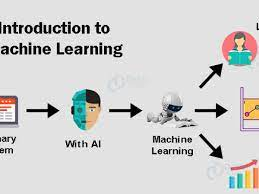
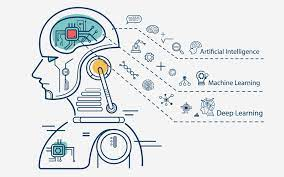
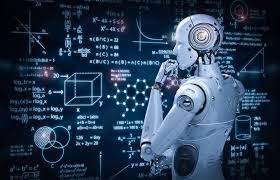
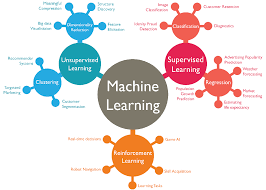
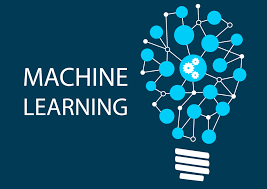
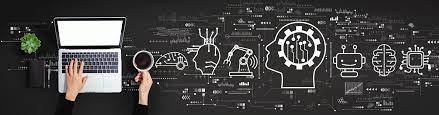
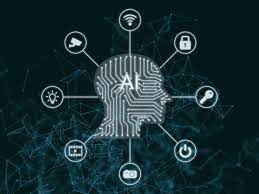
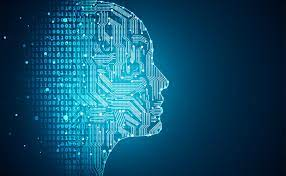
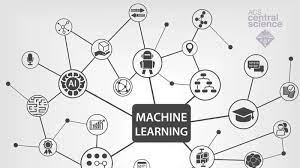
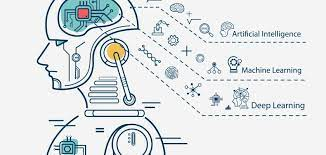
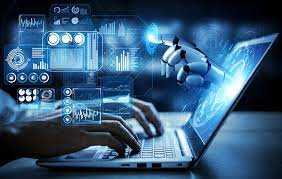
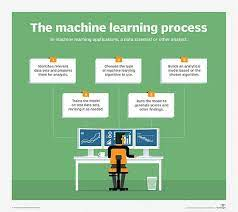
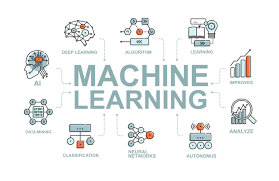
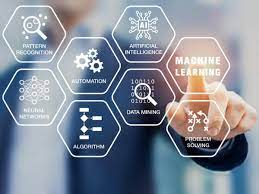
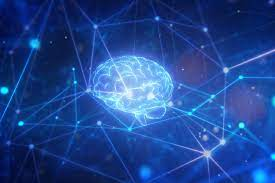
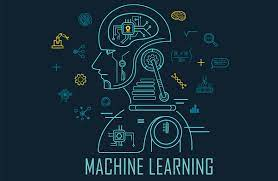
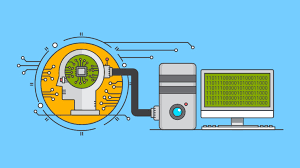
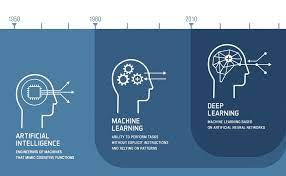
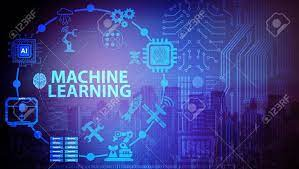
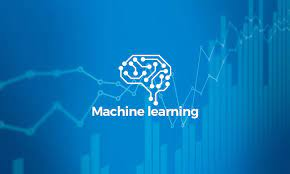

In [22]:
machine_learning=[]
for i in driver.find_elements_by_xpath("//div[@class='bRMDJf islir']/img"):
    machine_learning.append(i.get_attribute('src'))
machine_learning[:100]    
    

In [24]:
img=pd.DataFrame({})
img['Fruits']=fruits
img['Cars']=cars
img['Machine Learning']=machine_learning

In [25]:
img

,Fruits,Cars,Machine Learning
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


# Q4) Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on 
www.flipkart.com and scrape following details for all the search results displayed on 1st page. 
Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, 
“Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display 
Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. In 
case if any of the details is missing then replace it by “- “. Save your results in a dataframe 
and CSV.

In [49]:
url = "http://www.flipkart.com/"
driver.get(url)
time.sleep(6)


In [50]:
# Entering Iphone 12 in search field
search_field=driver.find_element_by_class_name("_3704LK")
search_field.send_keys("Iphone 12")

In [51]:
# clicking the search button
search_button=driver.find_element_by_class_name("L0Z3Pu")
search_button.click()


In [54]:
# creating empty list
brand=[]
smartphone=[]
ram=[]
rom=[]
p_camera=[]
s_camera=[]
display=[]
display_r=[]
processor=[]
processor_c=[]
battery=[]
price=[]
p_url=[]
discount=[]


In [98]:
# scrapping details
brands=driver.find_elements_by_class_name("_4rR01T")
for i in brands:
    if i.text is None :
        brand.append("--") 
    else:
        brand.append(i.text)
        
        
smartphones=driver.find_elements_by_class_name("_4rR01T")
for i in smartphones:
    if i.text is None :
        smartphone.append("--") 
    else:
        smartphone.append(i.text)
        
        
ROM=driver.find_elements_by_class_name('_1xgFaf')
for i in ROM:
    if i.text is None :
        rom.append("--") 
    else:
        rom.append(i.text)
        
prices=driver.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")
for i in prices:
    if i.text is None :
        price.append("--") 
    else:
        price.append(i.text)
                        
                
        
discounts=driver.find_elements_by_xpath("//div[@class='_3Ay6Sb']")
for i in discounts:
    if i.text is None :
        discount.append("--") 
    else:
        discount.append(i.text)

        
        


In [99]:
# making dataframe
mobiles=pd.DataFrame({})
mobiles['Brand,Color and RAM']=brand
mobiles['Smartphone Name']=smartphone
mobiles['Price']=price
mobiles['Discount']=discount
mobiles['All deatails, RAM, Camera, Display, Processor, Battery, etc']=rom

In [100]:
mobiles

,"Brand,Color and RAM",Smartphone Name,Price,Discount,"All deatails, RAM, Camera, Display, Processor, Battery, etc"
0,"APPLE iPhone 12 (Black, 128 GB)","APPLE iPhone 12 (Black, 128 GB)","₹82,900",2% off,128 GB ROM
1,"APPLE iPhone 12 (White, 128 GB)","APPLE iPhone 12 (White, 128 GB)","₹82,900",2% off,15.49 cm (6.1 inch) Super Retina XDR Display
2,"APPLE iPhone 12 (Blue, 64 GB)","APPLE iPhone 12 (Blue, 64 GB)","₹77,900",2% off,12MP + 12MP | 12MP Front Camera
3,"APPLE iPhone 12 (Green, 128 GB)","APPLE iPhone 12 (Green, 128 GB)","₹82,900",2% off,A14 Bionic Chip with Next Generation Neural En...
4,"APPLE iPhone 12 (Black, 64 GB)","APPLE iPhone 12 (Black, 64 GB)","₹77,900",2% off,Ceramic Shield
5,"APPLE iPhone 12 (Red, 128 GB)","APPLE iPhone 12 (Red, 128 GB)","₹82,900",2% off,IP68 Water Resistance
6,"APPLE iPhone 12 (Red, 64 GB)","APPLE iPhone 12 (Red, 64 GB)","₹77,900",2% off,All Screen OLED Display
7,"APPLE iPhone 12 (Green, 256 GB)","APPLE iPhone 12 (Green, 256 GB)","₹92,900",2% off,Brand Warranty for 1 Year
8,"APPLE iPhone 12 (White, 256 GB)","APPLE iPhone 12 (White, 256 GB)","₹92,900",2% off,128 GB ROM
9,"APPLE iPhone 12 (Black, 256 GB)","APPLE iPhone 12 (Black, 256 GB)","₹92,900",2% off,15.49 cm (6.1 inch) Super Retina XDR Display


# Q5) Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on 
google maps.

In [26]:
url = "https://www.google.co.in/maps/@10.8091781,78.2885026,7z"
driver.get(url)
time.sleep(6)


In [27]:
# seacrching place
Place = driver.find_element_by_class_name("tactile-searchbox-input")
Place.send_keys('leh')

In [28]:
# clicking
submit= driver.find_element_by_xpath("/html/body/jsl/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]/button")
submit.click()


In [35]:
#getting current url
driver.current_url

'https://www.google.co.in/maps/place/Leh/@34.1662418,77.4966977,12z/data=!4m5!3m4!1s0x38fdeb21445fed85:0xd1bb09975086f710!8m2!3d34.1525864!4d77.5770535'

In [43]:
# scrapping detail
latitude_and_longitude=[]
for i in driver.find_elements_by_xpath("//button[@aria-label='34.151200, 77.553863']"):
    latitude_and_longitude.append(i.text)
    

In [44]:
latitude_and_longitude

['34.151200, 77.553863']

In [47]:
# creating data frame
lat_long=pd.DataFrame({})
lat_long['Latitude and Longitude of Leh Ladakh']=latitude_and_longitude

In [48]:
lat_long

,Latitude and Longitude of Leh Ladakh
0,"34.151200, 77.553863"


# Q6) Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 –
September 20) from trak.in

In [53]:
url = "https://trak.in/india-startup-funding-investment-2015/"
driver.get(url)
time.sleep(6)


In [107]:
# Creating empty list
sr_no=[]
date=[]
startup=[]
vertical=[]
sub_vertical=[]
city=[]
investor_name=[]
investor_type=[]
amount=[]

In [109]:
# scrapping details
# july 2020 to september2020(down to up)
sr=driver.find_elements_by_class_name('column-1')
for i in sr:
    if i.text is None :
        sr_no.append("--") 
    else:
        sr_no.append(i.text)
        

        
dt=driver.find_elements_by_class_name('column-2')                                       
for i in dt:
    if i.text is None :
        date.append("--") 
    else:
        date.append(i.text)
        
        
strt=driver.find_elements_by_class_name('column-3')                                       
for i in strt:
    if i.text is None :
        startup.append("--") 
    else:
        startup.append(i.text)
        
vr=driver.find_elements_by_class_name('column-4')
for i in vr:
    if i.text is None :
        vertical.append("--") 
    else:
        vertical.append(i.text)
        

        
sv=driver.find_elements_by_class_name('column-5')                                       
for i in sv:
    if i.text is None :
        sub_vertical.append("--") 
    else:
        sub_vertical.append(i.text)
        
        
ct=driver.find_elements_by_class_name('column-6')                                       
for i in ct:
    if i.text is None :
        city.append("--") 
    else:
        city.append(i.text)

inv=driver.find_elements_by_class_name('column-7')                                       
for i in inv:
    if i.text is None :
        investor_name.append("--") 
    else:
        investor_name.append(i.text)
        
        
tp=driver.find_elements_by_class_name('column-8')                                       
for i in tp:
    if i.text is None :
        investor_type.append("--") 
    else:
        investor_type.append(i.text)
        

        
amnt=driver.find_elements_by_class_name('column-9')                                       
for i in amnt:
    if i.text is None :
        amount.append("--") 
    else:
        amount.append(i.text)
        
        
                        
                

In [130]:
# creating data frame
deals=pd.DataFrame({})
deals['Sr_No']=sr_no[71:105]
deals['Date']=date[71:105]
deals['Startup']=startup[71:105]
deals['Industry/Vertical']=vertical[71:105]
deals['Sub Vertical']=sub_vertical[71:105]
deals['City']=city[71:105]
deals['Investor Name']=investor_name[71:105]
deals['Investor Type']=investor_type[71:105]
deals['Amount']=amount[71:105]

In [131]:
deals

,Sr_No,Date,Startup,Industry/Vertical,Sub Vertical,City,Investor Name,Investor Type,Amount
0,1,08/09/2020,Byju’s,EduTech,Online Tutoring,Bangalore,"Silver Lake, Tiger Global, General Atlantic an...",Private Equity,"500,000,000"
1,2,12/09/2020,mCaffeine,Personal Care,Skincare & Haircare,Mumbai,"Amicus Capital Private Equity I LLP, Amicus Ca...",Series B,"3,000,000"
2,3,09/09/2020,Qshala,EduTech,Online Curiosity Platform for Kids,Bangalore,Rainmatter Capital,Angel,"370,000"
3,4,02/09/2020,Winzo,Online Gaming,Online Gaming,New Delhi,"Kalaari Capital Partners, IndigoEdge Managemen...",Series B,"15,500,000"
4,5,09/09/2020,Hippo Video,Video Customer Experience(CX) Platform,Video Customer Experience(CX) Platform,"Newark, Delaware, United States of Amercia","Alpha Wave Incubation, Exfinity Venture Partne...",Series A,"4,500,000"
5,6,07/09/2020,Melorra,E-commerce,Online Jewelry Store,Bangalore,"Shadow Holdings, Lightbox.",Debt Financing,"upto 8,900,000"
6,7,07/09/2020,1mg,E-commerce,Online Pharmacy,Gurgaon,"Gaja Capital, Tata Capital, Partners Group",In Progress,"100,000,000"
7,8,31/08/2020,mfine,HealthTech,On-Demand Healthcare Services,Bangalore,Caretech Pte Inc,Series B,"5,400,000"
8,9,31/08/2020,Apna,Human Resources,Recruitment Platform,Bangalore,Lightspeed India and Sequoia Capital India,Series A,"8,000,000"
9,10,03/09/2020,Railofy,Transportation,WL & RAC protection platform,Mumbai,Chiratae Ventures,Seed,"950,000"


# Q7) Write a program to scrap all the available details of best gaming laptops from digit.in

In [4]:
url = "https://www.digit.in/top-products/best-budget-gaming-laptop-3591.html"
driver.get(url)



In [55]:
# Locating the search bar
search_field=driver.find_element_by_id('globalPageSearchText')
search_field.send_keys("best gaming laptops")

In [33]:
# creating empty list
name=[]
seller=[]
price=[]


In [36]:
# scrapping deatil
names=driver.find_elements_by_xpath("//div[@class='TopNumbeHeading sticky-footer']")
for i in names:
    if i.text is None :
        name.append("--") 
    else:
        name.append(i.text)
        

        
sell=driver.find_elements_by_class_name('smmerchant')                                       
for i in sell:
    if i.text is None :
        seller.append("--") 
    else:
        seller.append(i.text)
        
        
pri=driver.find_elements_by_class_name('smprice')                                       
for i in pri:
    if i.text is None :
        price.append("--") 
    else:
        price.append(i.text)
        

In [38]:
# creating Dataframe
lappy=pd.DataFrame({})
lappy['Name']=name
lappy['Seller']=seller
lappy['Price']=price
lappy

,Name,Seller,Price
0,2.\nMSI GF63 THIN 9SC-240IN,N/A,₹54990
1,3.\nHP PAVILLION 15-BC512TX,N/A,₹59990
2,4.\nACER NITRO 5 AN517-51-53JG,amazon,₹73719
3,5.\nLENOVO LEGION Y7000 81V4000LIN,N/A,₹59990
4,6.\nASUS TUF GAMING FX505DD-AL185T,amazon,₹66990
5,7.\nHP PAVILION GAMING 15-EC0026AX,amazon,₹57990
6,8.\nASUS TUF GAMING FX505DY-BQ024T,amazon,₹62479
7,9.\nMI NOTEBOOK HORIZON EDITION 14,amazon,₹54990
8,10.\nASUS VIVOBOOK 14 X412FJ-EK513T,amazon,₹59999


# Q8) Write a python program to scrape the details for all billionaires from www.forbes.com. 
Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, 
“Industry”.


In [105]:
url = "https://www.forbes.com/billionaires/"
driver.get(url)
time.sleep(6)


In [108]:
# Creating empty list
rank=[]
name=[]
net_worth=[]
age=[]
citizenship=[]
industry=[]
source=[]

In [109]:
names=driver.find_elements_by_class_name('personName')
for i in names:
    if i.text is None :
        name.append("--") 
    else:
        name.append(i.text)
        
        
ranks=driver.find_elements_by_class_name("rank")
for i in ranks:
    if i.text is None :
        rank.append("--") 
    else:
        rank.append(i.text)
        
net=driver.find_elements_by_class_name('netWorth')
for i in net:
    if i.text is None :
        net_worth.append("--") 
    else:
        net_worth.append(i.text)
        
        
        
ages=driver.find_elements_by_class_name("age")
for i in ages:
    if i.text is None :
        age.append("--") 
    else:
        age.append(i.text)
        
        
        
citi=driver.find_elements_by_class_name("countryOfCitizenship")
for i in citi:
    if i.text is None :
        citizenship.append("--") 
    else:
        citizenship.append(i.text)
                        
            
ind=driver.find_elements_by_class_name("category")
for i in ind:
    if i.text is None :
        industry.append("--") 
    else:
        industry.append(i.text)        
        
        
src=driver.find_elements_by_class_name("source-column")
for i in src:
    if i.text is None :
        source.append("--") 
    else:
        source.append(i.text)        
                
        

In [112]:
# creating data frame
list=pd.DataFrame({})
list['Rank']=rank
list['Name']=name
list['Age']=age
list['Net Worth']=net_worth
list['Citizenship']=citizenship
list['Source']=source
list['Industry']=industry
list

,Rank,Name,Age,Net Worth,Citizenship,Source,Industry
0,RANK,NAME,AGE,NET WORTH,COUNTRY / TERRITORY,Amazon,INDUSTRY
1,1.,Jeff Bezos,57,$177 B,United States,"Tesla, SpaceX",Technology
2,2.,Elon Musk,49,$151 B,United States,LVMH,Automotive
3,3.,Bernard Arnault & family,72,$150 B,France,Microsoft,Fashion & Retail
4,4.,Bill Gates,65,$124 B,United States,Facebook,Technology
...,...,...,...,...,...,...,...
195,195.,Viktor Rashnikov,72,$11.2 B,Russia,real estate,Manufacturing
196,195.,Harry Triguboff,88,$11.2 B,Australia,oil,Real Estate
197,197.,Leonid Fedun & family,65,$11.1 B,Russia,"real estate, shipping",Energy
198,197.,Eyal Ofer,70,$11.1 B,Israel,Snapchat,Diversified


# Q9) Write a program to extract at least 500 Comments, Comment upvote and time when comment 
was posted from any YouTube Video.


In [4]:
url ="https://www.youtube.com/watch?v=RtO6vXgzPco"
driver.get(url)



In [9]:
# Creating empty list
comment=[]
upvote=[]


In [10]:
# scrapping comment first time

for item in range(500):
    comments=driver.find_elements_by_class_name('style-scope ytd-comment-renderer')
    for i in comments:
        comment.append(i.text)


In [12]:
# scrapping upvote first time
for item in range(500):
    upv=driver.find_elements_by_id('vote-count-middle')
    for i in upv:
        upvote.append(i.text)
        
    
    



In [25]:
# scrapping time
tim=[]
for item in range(500):
    tm=driver.find_elements_by_xpath("//yt-formatted-string[@class='published-time-text above-comment style-scope ytd-comment-renderer']/a")
    for i in tm:
        tim.append(i.text)
    

In [29]:
# Data Frame with time
video=pd.DataFrame({})
video['Comment']=comment[:500]
video['Comment Upvote']=upvote[500]
video[' Time since comment was posted']=tim[:500]
video

,Comment,Comment Upvote,Time since comment was posted
0,Pinned by T-Series\nTulsi Kumar\n1 day ago\nHe...,8,1 day ago
1,Hindi Romantic Songs\n7 hours ago\nMeri mummy ...,8,1 day ago
2,saurabh srivastava\n19 hours ago\nI am lucky I...,8,9 hours ago
3,Vikas 02\n2 hours ago\nHats off to all the bac...,8,3 hours ago
4,DHIRAJ TATHE\n18 hours ago\nWe missArijit sing...,8,19 hours ago
...,...,...,...
495,Hindi Romantic Songs\n7 hours ago\nMeri mummy ...,8,1 day ago
496,saurabh srivastava\n19 hours ago\nI am lucky I...,8,9 hours ago
497,Vikas 02\n2 hours ago\nHats off to all the bac...,8,3 hours ago
498,DHIRAJ TATHE\n18 hours ago\nWe missArijit sing...,8,19 hours ago


# Q10) Write a python program to scrape a data for all available Hostels from 
https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, 
distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms 
from price, facilities and property description.

In [57]:
url ="https://www.hostelworld.com/"
driver.get(url)
time.sleep(6)


In [58]:
# Locating the search bar
search_field=driver.find_element_by_id("search-input-field")
search_field.send_keys("london")

In [59]:
# clicking the search button
search_button=driver.find_element_by_id("search-button")
search_button.click()


In [62]:
# creating empty list
name=[]
distance=[]
rating=[]
total_review=[]
overall_review=[]
privates=[]
dorms=[]
facility=[]
description=[]

In [96]:
# scrapping detail
names=driver.find_elements_by_xpath("//h2[@class='title title-6']/a")
for i in names:
    if i.text is None :
        name.append("--") 
    else:
        name.append(i.text)
        
        
dist=driver.find_elements_by_class_name("description")
for i in dist:
    if i.text is None :
        distance.append("--") 
    else:
        distance.append(i.text)
        
ratings=driver.find_elements_by_xpath("//div[@class='rating rating-summary-container big']")
for i in ratings:
    if i.text is None :
        rating.append("--") 
    else:
        rating.append(i.text)
        
        
        
total=driver.find_elements_by_class_name("reviews")
for i in total:
    if i.text is None :
        total_review.append("--") 
    else:
        total_review.append(i.text)
        
        
        
pri=driver.find_elements_by_class_name("price title-5")
for i in pri:
    if i.text is None :
        privates.append("--") 
    else:
        privates.append(i.text)
                        
            
dr=driver.find_elements_by_class_name("price-col")
for i in dr:
    if i.text is None :
        dorms.append("--") 
    else:
        dorms.append(i.text)        
        
        
            
desc=driver.find_elements_by_class_name("keyword")
for i in desc:
    if i.text is None :
        description.append("--") 
    else:
        description.append(i.text)        
        
        
        
        
                

In [97]:
# creating data frame
hostel=pd.DataFrame({})
hostel['Name']=name
hostel['Distace From The City Centre']=distance
hostel['Ratings']=rating
hostel['Total Review']=total_review
hostel['Drivates from price and Dorms from price,']=dorms
hostel['Description']=description

In [98]:
hostel

,Name,Distace From The City Centre,Ratings,Total Review,"Drivates from price and Dorms from price,",Description
0,St Christopher's Village,Hostel - 1.8km from city centre,8.9,10814 Total Reviews,Privates From\nRs4267,Superb
1,Generator London,Hostel - 3km from city centre,8.9\nFabulous\n10814 Total Reviews,6729 Total Reviews,Dorms From\nRs1538,NEW
2,"PubLove @ The Crown, Battersea",Hostel - 4.7km from city centre,7.5\nVery Good\n6729 Total Reviews,204 Total Reviews,Privates From\nRs8156,Fabulous
3,Leman House,Hostel - 3.6km from city centre,7.9\nVery Good\n204 Total Reviews,13 Total Reviews,Dorms From\nRs1962,Very Good
4,247london Hostel and Private Rooms,Hostel - 8.2km from city centre,No Rating\n13 Total Reviews,443 Total Reviews,Privates From\nRs4956,Very Good
5,"PubLove @ The Steam Engine, Waterloo",Hostel - 0.5km from city centre,No Rating\n443 Total Reviews,183 Total Reviews,Dorms From\nRs1239,No Rating
6,The London Home Hostel,Hostel - 3.6km from city centre,8.7\nFabulous\n183 Total Reviews,248 Total Reviews,Privates From\nRs5575,No Rating
7,Wombat's The City Hostel London,Hostel - 3.6km from city centre,7.7\nVery Good\n248 Total Reviews,13123 Total Reviews,No Dorms Available,Fabulous
8,Safestay London Elephant & Castle,Hostel - 1.7km from city centre,9.3\nSuperb\n13123 Total Reviews,3930 Total Reviews,Privates From\nRs5265,Very Good
9,"PubLove @ The Green Man, Paddington",Hostel - 4.3km from city centre,8.0\nFabulous\n3930 Total Reviews,391 Total Reviews,No Dorms Available,Superb
